In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
import healpy as hp
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from readData import *
from nearNeighbors import *
from localBKG import *
from scipy import stats
import random
from bestBkg import *

In [2]:
# Define all relevant physical variables needed throughout the program, including:
# - number of LRG sources
# - number of survey (non-LRG) sources
# - coordinates for LRGs
# - coordinates for survey sources
# - projected radius from LRGs
# - LRG redshift
# - gmag and rmag for survey sources
# - gmag and rmag for LRGs
# - (g-r) color survey sources
# - (g-r) color for LRGs

# Number of LRG sources
lrg = 5

# Number of survey (non-LRG) sources
survey = 1000

# Fake coordinates for LRG sources
# random.seed(1)
# x0 = [np.random.uniform(0,5) for j in range(lrg)]
x0 = [0.1375387972268205, 4.057450054266215, 3.8024447869270124, 1.0820743922391107, 4.639149830473298]

# random.seed(2)
# y0 = [np.random.uniform(0,5) for j in range(lrg)]
y0 = [4.040580155629105, 1.4617854890325903, 3.0553807487103697, 1.0749114308140566, 3.029965430304804]

# y0 = random.sample(y0, len(y0))
# print("length of fake LRG sources (ra) = ", len(x0))
# print("length of fake LRG sources (dec) = ", len(y0))
# print("x0 = ", x0)
# print("y0 = ", y0)
# print(type(y0))

# Fake coordinates for survey sources
# random.seed(3)
# x1 = [np.random.uniform(0,5) for j in range(survey)]
x1 = [4.738028499973627, 3.0423236486783667, 2.554290593312804, 3.781030395402066, 1.5268248702016318, 1.103523396158375, 4.7915503076276975, 2.428999454668825, 0.9805708029800597, 3.3571812057782964, 0.2679408559645524, 0.09013409491383795, 3.1255827985354867, 0.44897546888570505, 4.229583478586745, 4.659987044827699, 0.8008388616884882, 2.789393829066404, 4.0075598534758035, 2.866286287348525, 3.0390499730497518, 4.759752687173418, 0.799350877166502, 1.3387183550545219, 4.5330536451958885, 2.8158529870798317, 1.7073644378990949, 0.03220628433547312, 4.982060884073058, 1.7544410405932749, 2.2930088463432456, 2.1645397297611413, 1.2588805887181516, 0.43449729508517443, 3.0689255448237827, 3.648171726237944, 0.1582427270464798, 4.022374901996207, 3.9788647308291214, 2.284952158204601, 1.794774460361589, 3.051046178142067, 2.4977509066753854, 0.694147121966166, 0.05527949917054298, 1.1488481232858472, 3.2013530342000567, 4.5009484434206355, 3.797119487582278, 1.3029670550502743, 0.6398225264070584, 2.892132897793564, 0.7770922209370712, 3.6078938668438543, 0.09869095958383645, 2.486685881026451, 4.610481353773969, 2.816800105694966, 3.0242756630043965, 2.5387444165175217, 3.573510718439623, 1.6136086385970532, 1.9656658382136227, 3.904430676312751, 2.4174047968224337, 2.792208967946041, 2.176116031838187, 2.9198709658477213, 4.371559544558785, 2.9986149573632503, 3.692503876632198, 3.380507023443959, 1.660743290500989, 2.257043527814922, 2.789312422840449, 3.7937508195676988, 3.8522231527952977, 1.3023474830313997, 3.4312278189122454, 2.3613835594955352, 3.929877371979818, 2.3276184266668243, 2.051779821184705, 0.941556403551273, 3.423949143959899, 3.43421401343869, 2.4760583195058, 0.8072430825896559, 0.4261278791627404, 0.11933330025533984, 0.9910066979788257, 1.5300892025914492, 0.7409835462260628, 4.221123323397947, 2.881554449682829, 3.5410183830322017, 3.4232764188792326, 1.0956677461027602, 0.19091217614402856, 1.3544722233236755, 4.362132374128648, 4.940201955117383, 2.7445653562400834, 4.673011711951446, 3.4464649884527123, 3.7780377941900376, 1.706188178276526, 4.710915751800408, 1.0250673654366622, 2.37153386709773, 3.6545256643470503, 1.2221260584623943, 3.4479020938451943, 2.154684295391285, 0.9915835528221711, 0.6769341274058421, 0.940727292484716, 0.8654794062040599, 2.1397722188435204, 2.097809464144222, 0.021163753520807016, 4.5588251271956235, 2.112117100207037, 1.0045596661115836, 4.943894132935408, 2.654167637003864, 3.36312267741195, 0.3928727389636061, 4.790176715571041, 4.514201640826109, 2.8054483808716926, 0.1454680609758452, 2.357518224942848, 2.4082930310497903, 4.177846071841486, 4.682768799438882, 0.13624920251944006, 3.2975855241991034, 3.6868411258134253, 3.04307742433363, 0.38125687309744083, 0.06592973239146149, 3.9238152280348686, 0.011713636255429871, 4.169539819350326, 1.2058777728715224, 4.825179109970888, 3.2040299409802877, 2.9568486494003055, 2.563066545664391, 3.855028416949274, 4.7759179004177295, 2.3691323310259005, 4.4339028492310515, 2.0970441739976304, 0.1315189752364737, 0.8242455837304641, 4.657803539028907, 4.97974910152222, 1.0429680814908844, 2.317237584461915, 4.4572754263157925, 1.5625823087816126, 1.7871404031173943, 4.389906777906525, 0.24365536404610033, 3.2044578638641106, 0.25082943115720957, 0.2876019658794682, 3.082646126728508, 0.6329138500685366, 0.71014396811864, 4.500736611506869, 1.9977870981598418, 3.7211618597815814, 3.2592453782456055, 2.7750095236627037, 2.444145762447416, 0.5398201244821471, 4.896044227734443, 0.23241002887657347, 4.1939552627545815, 0.1525044212368848, 2.8544510096613647, 4.66478553146338, 3.652213544312333, 2.656299645544429, 1.1893595821590726, 4.619679941928723, 1.4512810634573765, 0.1610005738941095, 0.29981977989879893, 1.0047617513187868, 2.101473228035005, 2.5809063113964537, 0.6636886037169681, 4.82376520835836, 2.4965954764851177, 3.2796858076598, 4.9589551468164315, 2.505490832466579, 2.917498292450187, 1.32148752276815, 3.9295233591379737, 3.809019282220743, 4.915529120175476, 2.392028674516942, 0.712316602492743, 2.6776028900018094, 3.850429980160829, 0.9015472993747492, 3.6002806258059006, 4.921724594066202, 3.680568443167855, 0.3334204757226672, 4.708286385527875, 2.686221078195865, 2.2479665110025437, 1.0437089224535423, 4.387587433679902, 1.5470048840947408, 3.1439294123382133, 0.11864362114932248, 1.5375359715698445, 2.3287495337818354, 3.226332372934791, 1.2872571376658208, 3.6402080313827527, 1.3133573985576046, 1.3546961872659802, 1.8609224331684149, 3.359955439310051, 0.5040808493737375, 1.6971987580463548, 3.3635023008012515, 3.026190125445967, 3.81057561057135, 4.187952852402197, 0.47759924940908693, 1.3833180513791614, 3.185741935869799, 0.0583937698560516, 0.8359224007953087, 4.155960082620148, 1.2899590284423286, 3.3316741482122945, 1.0050451933029458, 2.751105957560652, 4.079087356395285, 1.0110662250141556, 1.3477830009447367, 4.0892769029117435, 2.0915480902474703, 4.216820176139363, 1.117884783847246, 0.6174621891392501, 1.5145630701471957, 1.1200460133999512, 1.5871475759756026, 2.1619033474443583, 4.762581085480956, 0.74154680079768, 2.085484780583799, 3.8163929579963094, 2.3302577136251306, 3.941353209034129, 1.0601306565156499, 3.5341588210353385, 1.7121709093418418, 3.980015188681053, 4.371921482964959, 0.6013941587466315, 1.7852569209936124, 0.05441294048350864, 0.760216324774497, 2.856633122170495, 4.471193493866946, 2.284738354064282, 2.3039587423251735, 3.84515221068215, 3.8676792853673043, 4.922025352874694, 0.9156394637682225, 4.3131802364411715, 2.214056322550577, 3.985328872602918, 4.323382507966293, 0.9289252668124653, 4.933729121324923, 0.5213714895033394, 1.0138850385741482, 0.24410531446962425, 3.852553076316129, 4.4516995837337445, 4.957700399499027, 2.813100938902242, 4.063323704400119, 4.007760949922068, 1.683325483660918, 3.0189857445595862, 0.6388037201639141, 1.2320134484572849, 3.7819585918031433, 2.9700199385408075, 1.8137724319236548, 4.35839937277113, 0.9431960412591994, 3.5919294497316385, 0.22901833548133077, 2.862653113628661, 2.4423848871098377, 2.5143350901208987, 0.671526161779124, 2.5600174378112897, 3.8033583418221166, 0.4887718225658816, 0.4104849636837843, 4.066435555887525, 4.149662428092981, 2.789146815303541, 1.5800171773826543, 3.739272419841404, 0.944386851679096, 0.4446313829961107, 2.5706727263752787, 1.3179153713425236, 4.629351015608611, 0.6805827760331146, 4.2588632180823165, 1.212621797520096, 4.201473936411691, 1.2570084362209133, 3.874899877290479, 3.706694260853673, 1.033624620993533, 3.577453821363417, 3.2287389488191525, 3.3272444057020345, 3.9993349243280853, 3.012305631301798, 0.18070764137101736, 2.240669774223758, 3.103512118328073, 3.9315444610830297, 0.42084169429057183, 3.843769677818416, 0.29680357124983736, 0.4940047260061592, 1.132059772860055, 2.0398708262211946, 4.957297823712451, 3.615184728228453, 0.14098435053743863, 0.8236958686253409, 1.5867892188668815, 1.720190549880543, 4.503712033506929, 3.9627155863743995, 3.4945967605904036, 3.5214899947701195, 0.2612143404792461, 2.5599621241032926, 0.03192325909698979, 2.2826610369560916, 0.6962578734826186, 2.5588644758338877, 2.9167171651226957, 2.8916807225747148, 2.7204033604976434, 1.843698526569758, 1.046094422444836, 4.396034624901429, 4.158993324147284, 3.864630553224181, 2.2303601539109397, 4.416969193627882, 4.713854639787448, 3.0115170577212917, 2.287003789491879, 0.2157213228229954, 1.150832022269549, 0.9745584733775342, 4.107629524762278, 4.541411951849187, 4.4854917967802885, 4.129352454181862, 1.7255342019295772, 0.9903608804191116, 4.123605720450882, 3.3822686200309886, 1.0286540116488436, 3.215590591391584, 0.6987766479884355, 4.718032882258988, 4.664501624258203, 2.6704768505942855, 4.544119342716241, 2.0385433538984814, 0.05168352359869399, 3.344920397548887, 0.8508005802504182, 4.476937979532735, 4.647230954101245, 0.6257714671338604, 3.4680756872031075, 0.2842874241811483, 2.940174328391322, 2.399913529202138, 2.6543180982063457, 0.4106612773547186, 0.3453158614424856, 1.1654910404701697, 0.12359136837776563, 3.4714332443138134, 1.7653077463630829, 3.231738564842082, 0.964597289778571, 1.626322082979002, 1.5980239503266613, 3.4157214819127217, 0.5590183578224567, 2.778294723241941, 0.7870507746574923, 1.9162578769676664, 1.8249837709148609, 4.639705972050729, 2.887690823127919, 1.4584958520718216, 0.627681821899787, 0.8012306753618376, 2.7807550081368113, 2.193174484315443, 3.9728647811128086, 1.8774044888408552, 2.307916370040094, 3.7016277700320983, 3.904345302729515, 1.6710914708545017, 4.201484609278558, 3.6707439014390744, 2.5556371455660463, 2.3692081503370224, 1.22657604046909, 4.776305453167818, 4.78910467023454, 1.8244011202670678, 0.7530554607763223, 0.8658310755410986, 3.1758854866673962, 1.7673380935323924, 4.884774572545009, 1.4731198799608258, 0.6666089616540555, 4.656962635887066, 0.26209981286279715, 2.6885833089741955, 2.448587277604113, 4.276180810752565, 0.27613331148447995, 2.3249108127598124, 3.2527770758471415, 1.67214617155933, 2.545662819618582, 4.095786225439177, 2.5999229861188153, 4.074752711355123, 3.0448796686307587, 3.857067676492642, 0.7617139521957811, 3.2048578140025374, 0.031387192729304125, 4.9846910114869285, 1.7757949001660571, 1.6997183341053317, 2.626305275152187, 4.071655854019722, 0.06346720350189516, 2.654940525383755, 0.9489493622666645, 3.72034402274464, 1.5070738839771498, 4.1944165504564985, 2.948328091409485, 0.6433704617699071, 0.25474361362799625, 3.7313083796186843, 0.6563444276753361, 2.8328735131099734, 1.8415197314286802, 0.09919108304858648, 0.7303242037033458, 4.791371502092395, 0.2215605393699338, 0.3651218470823242, 4.521580098437257, 0.3348222196996081, 1.6027562490221126, 4.7858777939720305, 3.4447376017003597, 2.218355724786955, 2.86709784544104, 0.3284749088084532, 4.39921049071325, 1.3650776434417837, 2.7812845941044473, 1.363855543374104, 3.482792579959, 0.7657545439157243, 0.5390075894869256, 1.6671172281326068, 1.4735784542334636, 2.13120615203744, 1.6347171331071824, 4.961213846178264, 0.9216031082897796, 0.2252103157039842, 1.770726964306451, 0.87410920614993, 0.9601614736073616, 0.5416694294710445, 3.039345096763046, 2.8534460873314553, 3.8618407505917935, 0.29440177644257215, 4.9457998307002295, 1.5497465376191066, 0.06501568016952342, 2.6626071065875867, 3.7466315744847827, 3.359096894861027, 4.197437204008369, 0.06169927165951272, 1.2305169569165137, 1.060809607308637, 3.4917931590111193, 3.7427835974238164, 0.13264152127072104, 3.882680393945395, 3.853242296894285, 2.2432587559130095, 4.9580337007571105, 2.671174489451831, 2.633220594144519, 2.9755645537882587, 2.4752378271920064, 2.2115301308596225, 2.4777488929802756, 0.5869864070538522, 0.06828363402002935, 3.244212517330212, 4.003698474640593, 4.467894002330856, 4.86617243842071, 1.029480214737899, 0.10484295133147026, 4.896523865551693, 3.304316828595735, 1.341875774844875, 3.6461595427304823, 0.6597655101145034, 0.3932044803565493, 2.5689753968480638, 3.3375191522546026, 1.0054212025529885, 0.7878621719906148, 3.405074179367836, 2.5858644491102862, 3.198109995772678, 3.122653007131621, 2.0469235724307397, 2.795586632377009, 2.0678054080762385, 1.1295642564825903, 3.44694836825784, 1.725918287650301, 0.28755460736319405, 3.1309584535094777, 1.3595641624291999, 4.213590927060457, 3.790933700203492, 3.6562522846237155, 3.5671032824072495, 4.041296598923732, 3.284136743304602, 2.857073862871133, 2.021130633231127, 3.783919502027555, 3.3754757459361366, 1.5754386466161479, 4.679437057961034, 1.6849467929458584, 4.4617541856384175, 3.30392386264521, 1.0556286065851639, 1.5996005998567453, 1.6103968005838487, 1.6138732622772645, 1.196246175048223, 0.23430167394098145, 4.816311843666955, 2.9313284083479862, 3.9157692729264792, 4.509051759367817, 1.1593302756248147, 2.3928847797791137, 3.657073044099381, 0.33297113201312234, 1.1377683437668669, 0.4726172451164057, 4.212804124109427, 3.1750243105836167, 4.8769445367161, 2.0893835739840867, 3.9420437232731897, 2.7077703366323513, 3.2015410041280585, 0.9251030331849347, 4.811223629565863, 1.6237947654754987, 1.6802883789264627, 0.6874883027160245, 4.915053168348543, 1.4568184526569343, 1.6244411393916547, 4.364483713147916, 1.5037621252799993, 2.8080504814026104, 0.6615519895127397, 3.014738509639681, 0.8966413781631688, 4.422923882890989, 2.525454199361344, 3.707360251676744, 3.2745940724829925, 1.264338642487461, 3.8712394493633164, 1.7646333695359862, 3.5134020087319677, 2.3271243273520925, 1.6855444636759738, 0.6972834123771293, 1.2039402040012153, 4.5610756048525065, 4.77062561263979, 1.518962334900427, 4.227457312444345, 1.785325106196819, 1.0276121516812353, 2.050221719825711, 4.222203306558474, 0.2572451159786393, 0.7920289820415527, 3.1208928023412725, 3.3538040466700805, 0.4397471522391594, 3.024124329061537, 3.134367806462306, 1.512685190973278, 0.10686567110360812, 0.300775804518979, 1.4675554707997196, 1.7258382754323842, 1.3388825031493146, 4.872197855040132, 3.4522888026200977, 4.614056243620157, 4.337041674319606, 4.15924602335188, 3.9449916675079004, 1.6089899935114238, 2.4294050135167913, 3.189996180570944, 0.31721284066016264, 0.8186505616805972, 4.836659597114414, 2.889297090958392, 1.5935342912283983, 2.5620491549387325, 0.8907071563428126, 0.5689312404831409, 3.7313057135746113, 3.081911502374507, 1.6614181126281342, 0.46985355080222446, 1.217577901829493, 2.234923471068397, 0.1919387740472711, 4.203301351405911, 3.1908626050786437, 3.1246175403225225, 3.2295692881161764, 1.9153370267633503, 1.7203435203869315, 3.9686800693253312, 1.3143925733483774, 4.169137032014523, 1.1422261507473241, 4.073793079852243, 2.782539220731626, 1.546116368446564, 2.104308273459456, 2.8122489254482264, 2.0506063467683173, 1.7318416994044827, 3.8052544551688587, 3.8184325581188165, 1.8843428161347293, 4.405206420135006, 1.5455820400757803, 3.065262055037214, 4.792867148868123, 1.213719867002001, 1.2865202033616114, 4.3973149051985345, 4.289214613064017, 0.6722611766330716, 0.2543709913116926, 1.1931281011990469, 4.0449170020376215, 4.853688024318919, 2.0697509982146665, 2.27061606566617, 0.8101169072221082, 0.5564479397556227, 0.3030226319987628, 0.15942106795108657, 1.541838973641656, 3.2459035862931866, 2.550335495048566, 0.09944251527289061, 4.673299673266231, 3.2453859977547523, 3.6784500672755853, 4.180718852338224, 1.2225199485147864, 2.587344304590239, 3.1123275216918165, 2.026106604315505, 0.16376997013184458, 0.9866726312827734, 2.62253547657791, 4.581433199256163, 3.002166928216879, 1.3549237341752896, 0.9937707784350902, 1.2935165841454905, 4.176198404309711, 1.3933195862790888, 4.772213696640573, 2.246884324844589, 1.3829670956378315, 4.600293854765546, 0.31949772224477924, 0.4220862230569561, 0.9939994018990989, 2.6792036388875666, 4.294925778489558, 2.269088017390675, 4.491493678150834, 1.0757717733052292, 0.3934619145845053, 3.2940782999582434, 0.6909002860536984, 2.5469310491811132, 2.135104256233994, 0.10836141700414081, 1.044234732680256, 0.7430781482013926, 1.5705118268385054, 1.4393360187010047, 4.576389270158639, 0.38674511620033103, 4.57807135917972, 2.822630940352659, 2.9704584407285033, 0.3639773900141863, 1.3218298474163426, 4.9390093500921495, 3.760825810886806, 3.06814349428393, 3.08525538727576, 1.9219844370367212, 4.597831162862356, 1.7115592395456543, 4.522553914584871, 2.7030294572764375, 1.45417540729602, 3.8842683992362224, 1.0115661991003893, 4.06166991162743, 0.37238850370714616, 3.9648004800342256, 1.5321517336821562, 4.80402808164519, 3.0781711048360054, 3.3290057694217268, 2.2738808356729345, 0.5800164945618813, 1.334346010189118, 0.5026655857660561, 1.052751121995299, 3.35433317803447, 0.9787653691296472, 4.387403183280925, 1.4953492030640758, 0.6266358558397472, 0.7336661066620548, 2.9147891152994476, 3.6479565013333004, 3.5274277341111477, 4.934014336889087, 2.2254251110928163, 4.394334976703224, 4.405810429531648, 2.6752976125630528, 4.508122881067304, 3.962652112295857, 3.5162011046567376, 1.9511908034391667, 1.6904718047781069, 1.0439203717216765, 2.8773791854487794, 3.7445193875306773, 0.9431767298117866, 1.9175875211190607, 1.7576825993080303, 3.0836200679866343, 0.680276172216574, 4.122923481260628, 2.8960965085649644, 3.4335698874304317, 4.7889902445783665, 3.457177678473073, 0.5399618719482735, 0.7155286731741439, 3.015369112157511, 2.8890766835426462, 4.092819363655249, 0.025763181058617857, 0.2609300726714614, 1.48528484733637, 3.7107349826306475, 1.3442141976743334, 3.6250532502882664, 4.135904689751069, 3.545635233251438, 4.560219371060019, 2.8690088539569096, 3.523237350418827, 3.0017652345874657, 2.9894149537759684, 1.151685121875058, 2.4355918210913656, 1.4552340526429708, 0.8952881615301134, 1.4271513256606165, 0.8800947345341831, 4.010617293571091, 2.2056353847458103, 3.4922573111092268, 3.6423579488102513, 3.382393778128665, 3.1412128790076492, 0.7759832970954905, 2.3169430480256152, 3.624192171199689, 4.504726242193967, 4.7989570948976485, 4.1312264460440105, 4.414530167225926, 3.041669790666795, 1.792325012143583, 1.5581531644694524, 1.2789713759387404, 4.997788727167939, 1.593908408312571, 1.4749367059696246, 1.5110482410326254, 0.9118110925871881, 3.881514037021354, 2.8776184323599563, 2.8884049517810704, 0.7844491343652643, 3.5336900358764782, 4.403691679767466, 3.8067411566313885, 4.956378516825212, 0.8659389804819267, 3.0929786026075874, 4.876204369903531, 1.8988628808858214, 3.199380324819863, 4.805061266894736, 2.4176919997955966, 1.9570989485610828, 4.572117944212495, 2.3851482301642157, 1.997102345903636, 1.1996714310370833, 4.822752494607823, 0.8121702450792079, 3.5681960844884393, 0.23103441354686005, 3.675379271441168, 2.710739748719824, 3.197598794939693, 4.358415160013786, 1.0012856571009876, 3.69209782131743, 3.2509167866498445, 4.532659572926577, 4.961081568250881, 1.2400559188487632, 2.8627874682563945, 3.08158085229596, 4.90835836157476, 2.3497418628264537, 3.6717152468177088, 1.487529966525858, 4.906855678728461, 1.3330704784148073, 2.0861997001525663, 2.361281719327078, 0.8670324579102134, 4.669423961991075, 4.780743919237348, 0.955996545593229, 3.287575250320232, 0.4726051647612184, 2.8343559809966417, 4.913932800821001, 4.673423884886209, 2.3873388132258633, 0.049058222114711225, 2.0912913435938165, 4.141148977096234, 2.062189824533177, 4.133743291771011, 0.5017020614844037, 1.177480278987798, 3.853306976959891, 4.860408721124499, 4.113783061051551, 2.855722226682108, 2.526774218192504, 3.3062752003799227, 3.898691665890915, 3.925693536131891, 2.3675469761278425, 3.5565259121792714, 4.384377853931706, 3.8122765330733808, 2.517182624213001, 1.7741435727621757, 2.6642669152599012, 1.804556886145043, 0.0733543322862018, 4.615891777402951, 1.1216009514161356, 1.3125589367093355, 4.757970116899809, 0.9697420289797504, 2.57752951924082, 3.6596582110583586, 3.4484572524342587, 1.82487952542283, 4.238250080703305, 0.7700287488544394, 1.8470560924068096, 1.3948587822074543, 1.4029387966452695, 1.2096816704984676, 0.9365463964526466, 0.4082232537605135, 4.687373906485048, 0.8722568180646884, 4.927895344350569, 3.0366235271379036, 0.8821968950429288, 1.8833279449836682, 3.6870888110323845, 3.1777296392806464, 1.5474894158637487, 2.0899340029708235, 0.19505296625943191, 4.232018071855918, 1.6610014989447963, 3.38149272704873, 3.9606291855925875, 1.8860541629526257, 1.3086483493084704, 3.9401741722709787, 1.5617115865377462, 0.4896269987718088, 2.2654192372446986, 1.1881215600384016, 1.0922159380744145, 1.887851436086259, 3.5927787514600196, 4.815382118516541]

# random.seed(4)
# y1 = [np.random.uniform(0,5) for j in range(survey)]
# y1 = random.sample(y1, len(y1))
y1 = [0.3716341762441089, 0.7761076106604847, 4.387473379221065, 3.3160277534132385, 2.4192473909528673, 1.7403356512652068, 3.94888401128211, 3.391952627478265, 2.2058005587484253, 0.051150147027364534, 0.8791009858118565, 1.2941818112462433, 4.059157247849428, 4.186965482953763, 2.136177097031436, 2.483281361071249, 1.4586383994701935, 0.005456361748464311, 3.417845127431622, 2.7736071869600645, 2.89107339118749, 2.1924446658122827, 2.219082370882024, 1.3079656024051056, 0.5574322447183966, 2.3369093894339543, 0.6974858177003562, 3.2890739429813247, 4.29194820002216, 3.6115000377087245, 3.2887156656897965, 4.260675830023847, 3.5644257704327185, 2.951160038064406, 4.710692163642261, 3.2411204359534422, 2.1066846834687687, 0.38400138791453264, 2.6878903735284565, 0.974565399812336, 3.347660523933458, 0.5241557886617487, 4.212317283177684, 4.173662415619635, 2.987155768739665, 1.278604557226174, 0.19880028651746484, 0.3880900753487443, 0.6098852930396753, 2.162180697699733, 4.627755643390347, 0.7581089554584397, 0.4699470802242339, 1.5162860551556034, 0.16327050581247726, 4.294846582933109, 1.2480716747933562, 4.57426017603135, 1.4329402971037992, 1.4251599985225276, 3.074482681863713, 2.2487950005224007, 2.7855943188298395, 3.429844715348553, 4.95455145853826, 3.1078693343997155, 4.508805190132073, 1.9713852432310381, 1.3040593213502705, 0.4447362702052021, 1.5441018616020603, 2.4613319343093734, 1.1887013906124488, 0.3032408161034672, 0.10847365441873258, 0.4939045701095546, 0.02345701037517023, 3.985203942190449, 1.658782415110856, 1.2383507465827925, 1.1728475076297333, 1.5546748833318802, 3.492897864268611, 2.8134742193506765, 2.4263274145685516, 0.2975657715815605, 2.7170110740380977, 3.64684778519106, 0.9828916553586375, 1.523477234691057, 3.520207814659173, 2.7961115056442227, 0.2538383302648817, 1.70917340266743, 1.6319105036916155, 2.9624542710571427, 3.1327439969958397, 1.8254367811900352, 2.653573508056925, 4.530868886258411, 2.087752977981231, 1.097617641608708, 4.232222811729281, 4.776954741985892, 2.9754638030140774, 2.3762020431927082, 2.89795939364358, 2.934281603798679, 3.425745322721086, 1.1936027419689432, 2.8043636997429444, 2.2802302796223524, 2.3005001484533887, 3.285470354014051, 4.504254587061524, 0.12813305850648715, 4.146733433668796, 1.7916489469132872, 3.2235795285234747, 0.6748960503405399, 3.5981451350128446, 1.379411928246671, 3.5609758208770055, 0.12999907928663623, 4.71768026942575, 2.1082696414700224, 3.4338634766001035, 0.2212268454968841, 4.161645794922172, 2.6435069361772396, 1.3210423675168963, 4.1303066001641815, 3.067424160728374, 4.8780063189692715, 0.8358591649196184, 1.804246477616394, 4.473234252745197, 2.631593864163876, 2.1587120228342895, 2.6750027556946514, 3.932395699298323, 3.7180306812047363, 2.57284023458559, 2.629099367855127, 1.286696623946208, 3.160847156429565, 4.5473294866192955, 1.4006198233811258, 0.6603490388514666, 4.971216008700981, 0.9859299784316777, 0.493203883613586, 3.8543418610238, 4.796885696108816, 2.2173266067771746, 4.447561088671367, 2.832315850945561, 2.9002215276561456, 4.700455601889465, 2.467170465316812, 1.0265227881704186, 0.5214803108995913, 3.7412989371867034, 2.9343848527944605, 3.0632340240366487, 1.8677507928386272, 4.816151303323878, 3.5762809142771728, 3.9747013328162293, 1.4880242724328685, 1.2164186841721036, 1.133328368500266, 3.82600392416051, 0.3873532266755181, 3.761249445903909, 0.6824333838446467, 0.1599934638039474, 1.0933146248894, 2.9253693912359138, 2.6092336058713483, 2.199749877773999, 4.2842428927608305, 4.887637300335675, 2.689856931953532, 1.222364462773644, 3.9522817307832616, 2.721656841016034, 2.2977013284075944, 3.301072738668733, 2.2840754687936577, 2.1144233273537005, 0.00294770945144629, 1.1810890476767484, 0.12459989063160037, 2.4806940276542626, 3.630377399515235, 3.1344569931398625, 2.010625458008346, 0.5277105068025673, 4.353688907760948, 4.323183977908027, 3.2162499126589927, 2.107651070912229, 1.0460294378918933, 4.607990885557248, 4.57556513825495, 1.357106578042961, 2.9336886641250044, 2.9975430182278506, 0.31514327868407466, 4.473386913924454, 3.4675641332234752, 2.576630304575515, 2.2121145468734156, 3.6171905368041735, 2.054972357783444, 4.834825170564645, 0.7431324540790551, 2.6222994193734888, 3.797061982565393, 3.650386366171804, 1.137838131846491, 2.6453104695002194, 4.265013526054742, 3.1641323392221095, 2.574294252214781, 0.47127895830462563, 0.1513297903944394, 1.2352902989384817, 1.8230642738855185, 2.6281145471800134, 3.4675230016790035, 3.4700636587432387, 4.112393673137534, 2.4113400911814282, 1.5766304486591876, 3.3698499259472197, 0.31405159842365027, 3.9090498352004763, 0.968448246100429, 1.6727165899957925, 2.530301541965362, 1.9330715055527365, 0.8321947055042, 1.5689608835381785, 0.8411159931099382, 4.893462226375638, 1.2155541986113416, 1.6192085697705711, 1.957979123083483, 0.9096023242183471, 2.8186519841711832, 0.10622482154793833, 0.7109485337776272, 3.5448601616622866, 4.565561502149858, 0.3664188954412051, 1.5164794594430608, 2.790665515457364, 2.6888948612756476, 2.7412812432797384, 4.396526545055057, 3.2536418526705564, 3.553870340891799, 4.694299439239481, 2.6834175150326107, 2.722959300676684, 0.4554191350506115, 0.9150881360176871, 1.3070106275170146, 1.352934998800388, 4.383722920888562, 3.8909388002708263, 4.844320287142289, 2.22949989229067, 4.601198000876217, 1.3765732681934, 4.308954440031206, 3.4787111472108463, 2.4700216430464463, 3.326411159787632, 3.0271600718159277, 0.8719710039670392, 1.1484384915754036, 2.554188779026112, 3.277064752922275, 1.3838925511634819, 1.0436083385464678, 3.6263667930645886, 4.610979279106326, 4.812899599367185, 0.3008086873035548, 1.387866220209963, 3.1887224543803865, 4.752483484460176, 0.18241444616207192, 0.30825616839556147, 3.29027113473394, 4.341904007852626, 0.8666177844474154, 1.748495396879746, 3.4929850332651013, 1.4558144452010406, 2.379572726146386, 4.70596381418044, 0.07675819423066776, 2.0973833846732366, 4.660283821181866, 1.039240131611907, 2.981945204482774, 1.9169853511751855, 0.801010835440501, 4.02021675075792, 2.036467847929731, 1.5743827697008117, 1.264083441465726, 0.0040259813473031425, 0.15304073693844733, 4.517861657446922, 4.764687523046894, 3.663757231131477, 1.3676147829552532, 2.4749831471550947, 4.306918770222596, 2.149877922189518, 3.6008648844184106, 0.9355559320703405, 4.513299066888633, 1.2923846080258916, 1.339511655687073, 0.2213495867877613, 2.583819192634226, 2.9859884102199223, 1.7779966369781819, 3.7132810988931357, 2.461336042675932, 1.1549065020574694, 0.3819151653658426, 0.07425136229512685, 2.315394982412846, 0.7514582175103546, 4.693722406411775, 4.6446636557329395, 0.07600954634809087, 3.338563557135213, 1.5539150995616502, 2.7288659113218787, 4.013548695821438, 3.3251695214114987, 3.56618122902404, 0.3929581725882303, 0.6959992527154263, 3.0189088417924728, 2.0659279014470244, 4.076051770475338, 1.365747853509901, 1.4243446227555678, 4.130545466294927, 3.476256951284306, 3.6214030446362737, 2.629870422530397, 2.9835360642340762, 3.729711056937632, 4.30391661766219, 1.1444742599908864, 4.124931835018662, 0.7373717310129524, 4.782144631672279, 0.42053870144711125, 0.9569394499885914, 4.300503833171483, 4.294872391389781, 2.6403090902385857, 3.4376134230517468, 3.873039161385454, 1.333764592718723, 4.300497917073986, 4.734840689870458, 4.218390397405573, 1.0684655436056505, 0.030347140617532076, 0.8410103843317307, 3.162790712179126, 2.6969322809518053, 0.7694233199032641, 1.940601510739433, 3.7728722321443215, 1.271923480240974, 3.392794229073108, 3.6979349319792716, 4.974489437252581, 1.478277570414377, 1.6547778367916703, 4.933414299135148, 3.984613216441625, 0.732895661640301, 1.6450433784387104, 0.799049857040729, 1.9408013885470798, 1.400092221066277, 4.259112367600778, 0.03575687790295268, 3.3112614235729163, 0.9027877830995784, 4.298862590012122, 0.9016540558682312, 1.0522254130712856, 0.9954093330645286, 1.7942500818002634, 3.2497326443239953, 2.3169293399646707, 0.018953197110601616, 0.43462703161876504, 3.4373639177204014, 1.097748342237077, 0.19046161377900106, 4.815137210018822, 2.690570287975717, 1.2384452235120447, 2.409823732114101, 2.4405071120250756, 4.263145967938743, 3.7138082002165085, 3.620476430542159, 0.5751667084171641, 2.29036128257264, 0.7501910759584324, 4.591610670911573, 3.2420586138188434, 2.310370608821191, 3.0682081339923823, 3.8220051025997726, 3.0240195673615804, 2.187679860409142, 3.3708753615775526, 2.9016983790733213, 3.197646475452295, 0.12319749947543923, 3.1065744628706913, 4.962779715900646, 4.8381609734018465, 0.06059174952053159, 0.8509999834382809, 2.0585861438189172, 3.2130872160147934, 4.4432449672895995, 4.356004676947352, 2.2977613388772262, 4.8339250543981205, 2.506669490799134, 2.168665645534398, 2.8959337600954487, 4.3383125119757535, 3.7157901070465464, 1.7738434315272582, 1.625659685670211, 2.772540348942205, 3.2435075316759803, 3.5405428306302134, 3.8135065455809487, 1.3432366360726506, 4.633082566987696, 3.583966617027085, 1.0833400082272941, 0.2042852198084416, 4.5158784237717535, 2.92975273340471, 1.7648626886736218, 3.401961747009861, 0.16580925067239016, 2.7241106068437815, 0.6741994707728072, 3.2505736077972003, 1.514074791832423, 1.7973337193290562, 2.6111624824113977, 3.769446811112314, 2.9537047852832625, 3.0447265536740598, 3.991417715225576, 0.41045653536637305, 2.3895188131172467, 0.8363446048777584, 4.801968255384455, 3.882661094838359, 2.354832186228226, 4.451722522168675, 0.6232652298355151, 0.3649550760537207, 2.651723311454173, 0.5637370505520961, 1.5863094510350644, 2.0427450704710086, 0.1535695042900176, 3.8710750938296306, 1.1836545153370452, 4.057054572612992, 3.8297899225417114, 1.8315324335081096, 3.5566940914214995, 1.0612295628366581, 4.031596656939694, 1.316588713897866, 1.1652100789000346, 2.079666428845436, 1.2325276357410353, 4.689656567593107, 2.1158068558411953, 3.587295945842388, 1.6880050297683158, 4.986944473965867, 4.1976398357818265, 0.5208454464858331, 2.4212466901127754, 3.420587228958073, 4.809718887204936, 0.6907830815138971, 1.947367556912083, 0.9501380085073596, 0.1807753794000505, 2.4903537568029845, 0.22663103315351762, 4.893180297280966, 3.6326630887286573, 4.995458516477351, 4.929820506458593, 1.8213911382297159, 4.341509022895675, 4.342591814314106, 2.4424245946237733, 0.6134428384796642, 3.0507474568358606, 2.090456860609937, 1.4642002159601541, 2.0515664458314125, 1.7090322024468052, 1.6786071035883183, 1.3623402132811968, 4.999927640666674, 2.4004181668040236, 0.13459011964995993, 4.105498774120558, 0.8806705232146034, 2.9717093203001843, 2.010249317713542, 1.3235513718679914, 3.765463794366308, 1.4234267088700943, 4.988568983104621, 2.6768853295844384, 1.0823731228041178, 3.8000449306241606, 2.310630443870558, 1.2752451933563753, 2.651678955604195, 0.9258461286810288, 2.3592329851533127, 3.8572967024399256, 4.7789976993561565, 1.4248758616727741, 4.055808897277801, 2.172753713091594, 3.312840546916056, 4.891183028473282, 4.878073199984184, 3.114186147111054, 0.9383751411437408, 1.078127403247315, 2.603497492255566, 1.3248510373847884, 4.298631576979207, 1.6361141763257292, 1.525266611731182, 2.5965308794875037, 4.517341994615825, 3.6156839209832548, 2.2045530666706883, 1.3296511562953, 2.442847702579355, 4.144168213182137, 3.032122218557292, 1.4306474972540395, 1.1858784354780667, 0.6152037050676401, 0.5948208740584376, 1.3417103411389852, 1.4808062863670153, 4.792328521981895, 1.646782873730801, 2.2342163687748258, 2.3111006112107684, 0.9574436648343493, 2.0616362626038787, 3.567039724630524, 0.5076243989121448, 0.365477768620846, 0.23013901405630477, 1.616832195292584, 1.8481326890004595, 0.05987569804977666, 1.2083041720285053, 1.972357000138194, 1.063648920017154, 3.3373769012751704, 2.203970749962484, 2.6860441528535954, 0.4395887936863119, 0.6695930640783604, 3.631344251170291, 2.3969811964178076, 4.216273507190594, 3.454646506267726, 1.875335595852952, 1.7327207470518158, 1.1236551417075962, 3.1309811521107562, 4.165430611435531, 0.16932067107695403, 4.386943715228255, 2.3942302500226647, 4.702026479297735, 2.6752173782739845, 3.840203694851697, 0.2710705193991475, 3.427644453162921, 4.642743914405256, 1.4868709685620058, 2.680814122018117, 4.70376649734603, 3.692375525315563, 4.915253570770401, 1.6984616754972643, 4.382140722986195, 3.346137903783685, 0.007058413026135857, 0.9821404686292096, 1.4911322070680866, 4.26861342491367, 4.06165547270127, 3.4839761831652707, 0.5389390428344726, 3.8591211290976215, 2.574485554212887, 1.7816894121066074, 0.22839306846761664, 1.420281008829309, 4.622027999587251, 1.851843727168202, 1.368322000848421, 4.005925689559434, 0.6660087194842207, 1.525506922449043, 2.9886782632256415, 4.322254486466124, 0.7552315115794622, 4.574489036036978, 3.346201056469553, 1.4293107651703023, 2.426904854847126, 0.3930409003572116, 1.77626312584612, 2.363259008144935, 0.07338526549316937, 2.4867714062371835, 0.6577747090188979, 1.4057509372212684, 0.5077578961051438, 1.6861019995429882, 3.757056591996566, 0.5268924036459005, 1.5531510045300545, 1.2950410174648659, 2.534645012278605, 1.537787633546659, 4.001788130063566, 0.19084328876522227, 2.2994110685423634, 4.142197153223643, 0.3115386029222933, 1.7222541904824962, 4.258471636679247, 0.3048110921354058, 1.1502392144257534, 2.639923932724997, 2.8123670929541666, 3.6421227673497167, 1.312369959255872, 3.859232354674015, 0.019555508006832145, 2.4775141951756967, 4.807829287873743, 3.5675089473693022, 4.837993742070896, 2.9547990243339735, 3.8416862943326127, 4.955637497264147, 0.06407748116402046, 1.0409081767672357, 0.3179665970795281, 0.18729179043155797, 0.20062826391123778, 1.578645743132863, 1.3819237422032575, 0.5393527858779174, 1.8629939941462248, 3.7125027194440325, 0.8276065243773523, 3.7665018167790008, 2.227761510475921, 0.4901632220097918, 1.3893165297272563, 3.918794397141726, 1.6019572665494763, 3.9434509520551977, 0.9311500427245017, 2.5104710492651554, 4.345035175362565, 2.7288645484643235, 0.982785448188272, 4.777736606250206, 1.9015317660064157, 1.770395848868442, 0.19355140566159612, 0.4819248896379047, 3.6566319737093886, 4.937305780411244, 4.30394976287304, 2.6939513428121025, 4.648088034575077, 1.864077921857215, 4.701601105122276, 2.638265239695034, 1.6230243252924248, 3.9165372337418107, 2.557864271197991, 4.341308279619527, 2.717566299049893, 3.3692314685290308, 2.222115643955253, 2.351787182227132, 4.92594290001652, 4.104278204053095, 0.04327395877909479, 0.5050318741083976, 4.974281078691924, 1.456216538478945, 2.6359347443319274, 4.44415022898345, 4.248991571094402, 2.209514898454988, 2.951786081312917, 4.744900268727315, 2.9188626032948237, 0.06508675890931348, 4.558788914736457, 3.3438626374879235, 1.559983280426021, 4.547255259104486, 4.173011020591581, 3.050559297010893, 3.4948243659349054, 4.0077855826127795, 0.1491398216243245, 3.6989825354220933, 1.855567683653982, 3.747212669977129, 2.255348318025945, 4.599216782407859, 3.865200355256831, 3.103581445612493, 3.5947245414003386, 0.9423406578909704, 0.18428021531577465, 3.23469662185665, 4.088474138369216, 0.9330882257532741, 3.496614761459041, 2.5795154972367653, 3.9269616411981954, 1.4693116557626702, 4.301067996906266, 3.8149556955654544, 0.8049957617450865, 0.24843227303257998, 2.5799370972453524, 2.013060230057586, 4.2673636689002095, 3.7513571602718763, 4.446401663331956, 1.3326052749548807, 0.577451458657019, 1.2739001685564006, 3.8508534221819417, 4.331300430194308, 3.3663142900855907, 2.3106947545145404, 3.304246241097646, 1.422149800468726, 0.6853297786345336, 3.607794348600643, 4.974854589791828, 1.292633375499147, 4.371491398240557, 1.592801225672749, 2.688133502297962, 3.049528295608939, 1.8746025168053242, 0.05771046997450069, 4.034759179949074, 3.4718085501145755, 4.428709665440694, 1.891064405077418, 4.906944107539545, 3.886707886924094, 0.9983108714494765, 1.8907770009931801, 1.7789891112344618, 1.1906422964065067, 3.3081443749848924, 3.845314202485542, 3.7690797692978997, 2.1883532745179752, 3.3917390943471295, 4.630123725130933, 2.647915970722976, 0.08535636981019168, 3.221057219050236, 4.346725481659858, 2.9800488821791866, 2.6934744809244426, 2.1401451330480077, 0.15905044454761985, 2.2329415856221613, 1.0050886572894808, 3.7184581075615117, 3.7381456476799317, 4.203429574909029, 4.157982415957864, 3.938409960426539, 2.4636939660702644, 4.411214484952165, 1.8736763056219086, 1.380267997184554, 0.3317914265598265, 0.06636783328970941, 4.813689297758061, 3.063497072296246, 3.638937906584954, 4.746870995352666, 0.7299395481657855, 3.7216725162282085, 2.4977240299549375, 4.180090994282613, 0.9236065761251, 2.532331728429897, 1.9679782338887997, 3.449238580264919, 1.277992798023873, 4.646773034755342, 1.4495399661022508, 3.3878670567905216, 1.4483020817402763, 0.1767837988635801, 2.2877270377100096, 0.6007372884215906, 2.023534384810859, 2.1395472649005725, 4.409728900204516, 0.7668115692636468, 1.2058119143383594, 1.6452789925421574, 1.5329799296982793, 3.4441854650292654, 4.402946357470595, 4.761572123412706, 1.5202756604534713, 1.7465133898617187, 2.5418003496553583, 1.1108572967970576, 4.973510829416416, 0.784025287525979, 3.912745425535635, 0.9053169800614619, 0.7379575965835561, 4.30896487049601, 2.5812241676625214, 2.123850262471839, 1.8294612161789252, 2.5400947331489236, 3.4319499483221776, 3.6316107595273515, 3.4958580917706956, 3.7763057187530706, 4.497181127869608, 3.4369376308214634, 1.0347816475865101, 1.8170784289485327, 4.604369120406685, 4.262836121888004, 0.8001623869000934, 2.990316950465941, 0.8660751249563647, 0.3989550864733593, 0.7957572545384672, 3.301292270939318, 0.31628742022585643, 4.741321574152456, 1.2592176460418625, 4.056055573125996, 2.0878459204509654, 1.5645844286260036, 1.7390721609542914, 4.951726059178579, 0.9503579544412499, 1.119116013173254, 0.4589856893177202, 3.251947684953929, 4.250984546081329, 1.214793826390928, 1.5457861711480592, 2.9072331855697557, 4.425490603023812, 3.536901585802072, 2.352473975984824, 4.861737404695474, 4.227329890382552, 4.745412952078528, 1.6211685215263931, 0.49424798997323494, 0.7126492135602608, 3.5048323752570285, 0.5980888245348936, 4.286186577681811, 0.3217567981732361, 2.271588262874319, 0.36642405091924624, 1.455374582878164, 0.272592368657798, 3.1338574186477937, 1.0553600880028973, 3.8083177472745784, 2.778286858842698, 4.970971082953961, 0.22769861108923928, 1.042921513149468, 0.8655047831132828, 0.7027028023761778, 4.481164404023598, 3.8087111227003496, 3.0955638198924467, 4.323437597585691, 2.4549650990456726, 2.5037464566173457, 4.3926423672045205, 0.18182140833431615, 2.8100106270539715, 2.4510360373876745, 4.732435465638063, 3.5454642060911556, 3.462911257875576, 3.3696158737904036, 4.757783487960981, 2.215333979116896, 1.0206136285018397, 1.9147083262852538, 1.3714285417577843, 4.093187015764498, 3.795281172143072, 3.5282210819872937, 0.1561766979057988, 4.3088296684223275, 9.279943632478638e-05, 2.896594032408885, 3.2985345276139197, 3.839504546207352, 4.585816362926891, 1.782739657788381, 0.5929321970749729, 0.5397931384931876, 3.338091012420237, 4.821099550228097, 4.492405023279665, 0.8677364659559306, 3.452505690234201, 2.5032034802693426, 0.74125891562972, 4.839859935272413, 3.5739279978539833, 2.767468165495062, 4.387016339675933, 1.6072276501104177, 3.6164379696514715, 4.489159640917905, 2.604389997172394, 4.928624634603521, 2.8591847192066755, 0.5237741196860135, 4.46714037578534, 3.6749425094172743, 4.08087376151005]
    
# print("length of fake survey sources (ra) = ", len(x1))
# print("length of fake survey sources (dec) = ", len(y1))    

# In order for there to be at least one guaranteed satellite, combine the survey and lrg position arrays so that one
# survey source position is the same as an LRG position
x_plus = np.concatenate([x0, x1])
y_plus = np.concatenate([y0, y1])

# print("length of x_plus (ra) (lrgs + survey) =", len(x_plus))
# print("length of y_plus (dec) (lrg + survey) =", len(y_plus))

# Redshift for LRG 
random.seed(0.2)
z = [np.random.uniform(0.1,0.5) for j in range(lrg)]
    
# print("length of array of redshifts for fake LRGs =", len(z))
# print("max z = ", np.amax(z))
# print("min z = ", np.amin(z))

# Magnitudes for survey sources
random.seed(15)
gmag_plus = [np.random.uniform(14,29) for j in range(len(x_plus))]
random.seed(16)
rmag_plus = [np.random.uniform(13,24) for j in range(len(x_plus))]

gmag_plus = np.array(gmag_plus)
rmag_plus = np.array(rmag_plus)
color_plus = gmag_plus - rmag_plus
    
# print("length of gmag for survey soruces =", len(gmag_plus))
# print("length of rmag for survey soruces =", len(rmag_plus))
# print("max gmag_plus = ", np.amax(gmag_plus))
# print("min gmag_plus = ", np.amin(gmag_plus))
# print("max rmag_plus = ", np.amax(rmag_plus))
# print("min rmag_plus = ", np.amin(rmag_plus))
# print("length of color_plus = ", len(color_plus))
# print("max color = ", np.amax(color_plus))
# print("min color = ", np.amin(color_plus))

random.seed(15)
gmag_survey = [np.random.uniform(14,29) for j in range(len(x1))]
random.seed(16)
rmag_survey = [np.random.uniform(13,24) for j in range(len(x1))]

gmag_survey = np.array(gmag_survey)
rmag_survey = np.array(rmag_survey)
color_survey = gmag_survey - rmag_survey
    
# print("length of gmag for survey soruces =", len(gmag_survey))
# print("length of rmag for survey soruces =", len(rmag_survey))
# print("max gmag_plus = ", np.amax(gmag_survey))
# print("min gmag_plus = ", np.amin(gmag_survey))
print("max rmag_plus = ", np.amax(rmag_survey))
print("min rmag_plus = ", np.amin(rmag_survey))
# print("length of color_plus = ", len(color_survey))
print("max color = ", np.amax(color_survey))
print("min color = ", np.amin(color_survey))

# Magnitudes for LRG sources
random.seed(20)
gmag_lrg = [np.random.uniform(17,23) for j in range(lrg)]
random.seed(21)
rmag_lrg = [np.random.uniform(16,21) for j in range(lrg)]
    
# print("length of gmag for survey soruces =", len(gmag_lrg))
# print("length of rmag for survey soruces =", len(rmag_lrg))
# print("max gmag_lrg = ", np.amax(gmag_lrg))
# print("min gmag_lrg = ", np.amin(gmag_lrg))
# print("max rmag_lrg = ", np.amax(rmag_lrg))
# print("min rmag_lrg = ", np.amin(rmag_lrg))

gmag_lrg = np.array(gmag_lrg)
rmag_lrg = np.array(rmag_lrg)
color_lrg = gmag_lrg - rmag_lrg
# print("length of color_lrg = ", len(color_lrg))

# distance = 0.5 # in Mpc
# print("distance in Mpc =", distance)
# distance_kpc = distance * 10.**3. # in kpc
# print("distance in kpc = ", distance_kpc)

max rmag_plus =  23.96904922356436
min rmag_plus =  13.001546053836815
max color =  15.261028992740766
min color =  -9.50843997944765


In [3]:
DTT_Gyr, age_Gyr, zage_Gyr, DCMR_Mpc, DCMR_Gyr, DA_Mpc, DA_Gyr, kpc_DA, DL_Mpc, DL_Gyr, V_Gpc = cosmoCalcfunc(z)

print("end cosmoCalc")

end cosmoCalc


In [4]:
#### TESTING FOR BESTBKG

# Convert inner radius from Mpc to kpc
# radius_inner = 5.  # in Mpc
# radius_inner_kpc = radius_inner * 10. ** 3.  # in kpc

# Converts inner radius from kpc to arcsec
# radius_inner_arcsec = []
# for i in range(len(kpc_DA)):
#     radius_inner_arcsec.append(radius_inner_kpc / kpc_DA[i]) # only using for bkg array so only need dist_inner in arcsec

# Convert outer radius from Mpc to kpc
# radius_outer = 10.  # in Mpc
# radius_outer_kpc = radius_outer * 10. ** 3.  # in kpc
radius_max = 0.4

# Converts outer radius from kpc to degree
# radius_outer_deg = []
# for i in range(len(kpc_DA)):
#     radius_outer_deg.append((radius_outer_kpc / kpc_DA[i]) * 1. / 3600.)

# Creates a list of ordered pairs; zips ra and dec together so they can be fed into KDTree
zip_list_LRG = list(zip(x0, y0))
zip_list_BKG = list(zip(x1, y1))

# Creates a tree of EDR sources
gal_tree_outer = KDTree(zip_list_BKG)

# find indices of sources
# creates a list of arrays that include the indices of satellite galaxies per LRG. In general, some or all of these
# arrays could be empty
ind_outer = gal_tree_outer.query_radius(zip_list_LRG, r=radius_max)

# returns a list of sources and their distances from the LRG within radius dist_outer
nn_outer, dist_outer = gal_tree_outer.query_radius(zip_list_LRG, r=radius_max, return_distance=True)

# print(nn_outer[0])
# print(dist_outer[0])
# print(len(dist_outer))
print(ind_outer[0]) 
print(dist_outer[0])

[141 362 765 476 716  13 140 501 238 838 347 560 484 168 131]
[0.33040282 0.32832033 0.29481486 0.28106919 0.32610216 0.3441242
 0.26665029 0.19114733 0.36461121 0.15143493 0.35748938 0.25611883
 0.19666062 0.16388708 0.09007612]


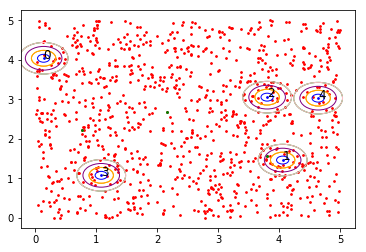

In [5]:
plt.scatter(x1, y1, s = 3, color='red')
plt.scatter(x0, y0, s = 3, color='blue')
plt.scatter(x1[274], y1[274], s=3.5, color='green')
plt.scatter(x1[259], y1[259], s=3.5, color='green')
plt.scatter(x1[314], y1[314], s=3.5, color='green')

circle1 = []
for i in range(len(x0)):
    circle1 = plt.Circle((x0[i],y0[i]), radius_max, color='green', fill=False)
    circle2 = plt.Circle((x0[i],y0[i]), 0.4, color='pink', fill=False)
    circle3 = plt.Circle((x0[i],y0[i]), 0.3, color='purple', fill=False)
    circle4 = plt.Circle((x0[i],y0[i]), 0.2, color='orange', fill=False)
    circle5 = plt.Circle((x0[i],y0[i]), 0.1, color='blue', fill=False)
    plt.gcf().gca().add_artist(circle1)
    plt.gcf().gca().add_artist(circle2)
    plt.gcf().gca().add_artist(circle3)
    plt.gcf().gca().add_artist(circle4)
    plt.gcf().gca().add_artist(circle4)
    plt.gcf().gca().add_artist(circle5)
    
# prints ID numbers next to LRG
# This will be slightly different when using real data because those sources have real ID numbers
a = np.arange(0,lrg)
for i, txt in enumerate(a):
    text = plt.annotate(txt, (x0[i],y0[i]))
    text.set_fontsize(12)

plt.rcParams["figure.figsize"] = [15, 15]
plt.show()

# print(x0)
# print(y0)
# print('--------')
# print(x1)
# print(y1)



In [14]:
xedges = np.array([13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.])
yedges = np.array([-10., -8., -6., -4., -2., 0., 2., 4., 6., 8., 10., 12., 14., 16.]) 

b = [0.,1.,2.,3.]

sumSigma0 = []
outer_radius0 = []
inner_radius0 = []
sumbkg0 = []
error0 = []
sigma0 = []
area0 = []

sumSigma1 = []
outer_radius1 = []
inner_radius1 = []
sumbkg1 = []
error1 = []
sigma1 = []
area1 = []

sumSigma2 = []
outer_radius2 = []
inner_radius2 = []
sumbkg2 = []
error2 = []
sigma2 = []
area2 = []

sumSigma3 = []
outer_radius3 = []
inner_radius3 = []
sumbkg3 = []
error3 = []
sigma3 = []
area3 = []


sumSigma = [sumSigma0, sumSigma1, sumSigma2, sumSigma3]
outer_radius = [outer_radius0, outer_radius1, outer_radius2, outer_radius3]
inner_radius = [inner_radius0, inner_radius1, inner_radius2, inner_radius3]
sumbkg = [sumbkg0, sumbkg1, sumbkg2, sumbkg3]
error = [error0, error1, error2, error3]
sigma = [sigma0, sigma1, sigma2, sigma3]
area = [area0, area1, area2, area3]

bdict = {'var1': sumSigma, 'var2': outer_radius, 'var3': inner_radius, 'var4': sumbkg, 'var5': error, 'var6': sigma, 'var7': area}
s = bdict['var1']
print(s)

sumSigma_dict = dict(enumerate(sumSigma))
outerradius_dict = dict(enumerate(outer_radius))
innerradius_dict = dict(enumerate(inner_radius))
sumbkg_dict = dict(enumerate(sumbkg))
error_dict = dict(enumerate(error))
sigma_dict = dict(enumerate(sigma))
area_dict = dict(enumerate(area))

# In [14]: a = np.array([1,2,3,4])

# In [15]: bdict = {“var1” : a}

# In [16]: bdict[“var1"]
# Out[16]: array([1, 2, 3, 4])

# In [17]: b = np.array([5,6,7,8])

# In [18]: bdict[“var2”] = b

# In [19]: bdict
# Out[19]: {‘var1’: array([1, 2, 3, 4]), ‘var2’: array([5, 6, 7, 8])}

# In [20]: i = 1

# In [21]: bdict[“var”+str(i)]
# Out[21]: array([1, 2, 3, 4])


# sumSigma0 = []
# outer_radius0 = []
# inner_radius0 = []
# sumbkg0 = []
# error0 = []
# sigma0 = []
# area0 = []

# sumSigma1 = []
# outer_radius1 = []
# inner_radius1 = []
# bkg1 = []
# error1 = []
# sigma1 = []
# area1 = []

# sumSigma2 = []
# outer_radius2 = []
# inner_radius2 = []
# bkg2 = []
# error2 = []
# sigma2 = []
# area2 = []

# sumSigma3 = []
# outer_radius3 = []
# inner_radius3 = []
# bkg3 = []
# error3 = []
# sigma3 = []
# area3 = []

for i in range(len(ind_outer)):
    for j in range(len(b)):
        result = bestBKG(4., b[j], dist_outer[i], ind_outer[i], radius_max, xedges, yedges, rmag_survey, color_survey)
        sumSigma_dict[j].append(result[0])
        outerradius_dict[j].append(result[1]) 
        innerradius_dict[j].append(result[2])
        sumbkg_dict[j].append(result[3])
        error_dict[j].append(result[4]) 
        sigma_dict[j].append(result[5]) 
        area_dict[j].append(result[6]) 
        
print(sumSigma_dict[0])
print(outerradius_dict[0])
print('--------')
print(sumSigma_dict[1])
print(outerradius_dict[1])
print('--------')
print(sumSigma_dict[2])
print(outerradius_dict[2])
print('--------')
print(sumSigma_dict[3])
print(outerradius_dict[3])
        
# sumSigma9 = []
# for i in range(len(b)):
#     result0 = bestBKG(4., b[i], dist_outer, ind_outer, radius_max, xedges, yedges, rmag_survey, color_survey)
#     result1 = bestBKG(4., b[1], dist_outer[i], ind_outer[i], radius_max, kpc_DA[i], xedges, yedges, rmag_survey, color_survey)
#     result2 = bestBKG(4., b[2], dist_outer[i], ind_outer[i], radius_max, kpc_DA[i], xedges, yedges, rmag_survey, color_survey)
#     result3 = bestBKG(4., b[3], dist_outer[i], ind_outer[i], radius_max, kpc_DA[i], xedges, yedges, rmag_survey, color_survey)
#     sumSigma_dict[i].append(result0[0])
#     bdict['var2'] 
#     bdict['var3'] 
#     bdict['var4'] 
#     bdict['var5']
#     bdict['var6'] 
#     bdict['var7'] 
#     sumSigma9.append(result0[0])
#     outer_radius1.append(result1[1])
#     inner_radius1.append(result1[2])
#     bkg1.append(result1[3])
#     error1.append(result1[4])
#     sigma1.append(result1[5])
#     area1.append(result1[6])
#     sumSigma2.append(result2[0])
#     outer_radius2.append(result2[1])
#     inner_radius2.append(result2[2])
#     bkg2.append(result2[3])
#     error2.append(result2[4])
#     sigma2.append(result2[5])
#     area2.append(result2[6])
#     sumSigma3.append(result3[0])
#     outer_radius3.append(result3[1])
#     inner_radius3.append(result3[2])
#     bkg3.append(result3[3])
#     error3.append(result3[4])
#     sigma3.append(result3[5])
#     area3.append(result3[6])

# print(sumSigma_dict[0])
# print(sumSigma_dict[1])
# print(sumSigma_dict[2])
# print(sumSigma_dict[3])
# print(sumSigma9)


[[], [], [], []]
[31.830988618379067, 0.0, 0.0, 31.830988618379067, 31.830988618379067]
[0.1, 0.1, 0.1, 0.1, 0.1]
--------
[42.44131815783875, 53.051647697298435, 63.661977236758126, 42.44131815783875, 21.220659078919375]
[0.2, 0.2, 0.2, 0.2, 0.2]
--------
[25.464790894703246, 95.49296585513719, 50.92958178940649, 63.66197723675812, 44.56338406573068]
[0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004]
--------
[27.2837045300392, 54.56740906007839, 63.66197723675813, 40.925556795058796, 18.189136353359466]
[0.4, 0.4, 0.4, 0.4, 0.4]


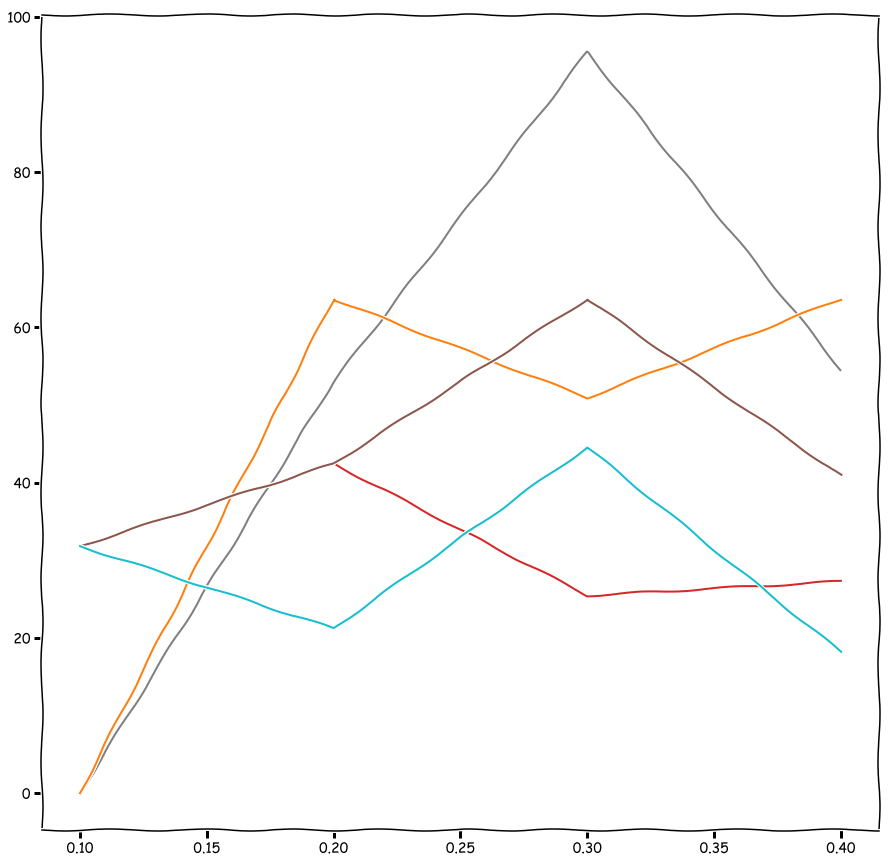

In [22]:
sumSig_temp = []
outer_temp = []

plt.xkcd()
for i in range(len(x0)):
    for j in range(len(b)):
        sumSig_temp.append(sumSigma_dict[j][i])
        outer_temp.append(outerradius_dict[j][i])
#         print(sumSig_temp)
#         print(outer_temp)
#         print('------')
        plt.plot(outer_temp, sumSig_temp) #, marker='o')
    sumSig_temp = []
    outer_temp = []
    
plt.rcParams["figure.figsize"] = [15, 15]
plt.show()

In [14]:
sumSigma0 = []
outer_radius0 = []
inner_radius0 = []
sumbkg0 = []
error0 = []
sigma0 = []
area0 = []

sumSigma1 = []
outer_radius1 = []
inner_radius1 = []
sumbkg1 = []
error1 = []
sigma1 = []
area1 = []

sumSigma2 = []
outer_radius2 = []
inner_radius2 = []
sumbkg2 = []
error2 = []
sigma2 = []
area2 = []

sumSigma3 = []
outer_radius3 = []
inner_radius3 = []
sumbkg3 = []
error3 = []
sigma3 = []
area3 = []

sumSigma = [sumSigma0, sumSigma1, sumSigma2, sumSigma3]

sumSigma_dict = dict(enumerate(sumSigma))

xedges = np.array([13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.])
yedges = np.array([-10., -8., -6., -4., -2., 0., 2., 4., 6., 8., 10., 12., 14., 16.]) 

b = [0.,1.,2.,3.]
sumSigma9 = []
for i in range(len(b)):
    result0 = bestBKG(4., b[i], dist_outer, ind_outer, radius_max, xedges, yedges, rmag_survey, color_survey)
    sumSigma9.append(result0[0])
    sumSigma_dict[i].append(result0[0])
    
print(sumSigma9)
print('---------')
print(sumSigma_dict[0])
print(sumSigma_dict[1])
print(sumSigma_dict[2])
print(sumSigma_dict[3])

[95.4929658551372, 222.81692032865345, 280.1126998417357, 204.62778397529397]
---------
[95.4929658551372]
[222.81692032865345]
[280.1126998417357]
[204.62778397529397]


In [8]:
print('area0:', area0)
# print('area1:', area1)
# print('area2:', area2)
# print('area3:', area3)
print('---------')
print("inner radius0:", inner_radius0)
# print("inner radius1:", inner_radius1)
# print("inner radius2:", inner_radius2)
# print("inner radius3:", inner_radius3)
print('---------')
print("outer radius:", outer_radius0)
# print("outer radius:", outer_radius1)
# print("outer radius:", outer_radius2)
# print("outer radius:", outer_radius3)
print('---------')
print("sum sigma0:", sumSigma0)
# print("sum sigma1:", sumSigma1)
# print("sum sigma2:", sumSigma2)
# print("sum sigma3:", sumSigma3)
print('---------')
# print(np.pi*(outer_radius[0]**2. - inner_radius[0]**2.))
# print(np.pi*(outer_radius[1]**2. - inner_radius[1]**2.))
# print(np.pi*(outer_radius[2]**2. - inner_radius[2]**2.))
# print(np.pi*(outer_radius[3]**2. - inner_radius[3]**2.))
# print(np.pi*(outer_radius[4]**2. - inner_radius[4]**2.))

# print('--------')

# print("inner radius:", inner_radius)
# print("outer radius:", outer_radius)

# print('--------')

# print(len(bkg))
# print("bkg:")
# print("")
# print(bkg)

sumbkg0 = []
sumbkg1 = []
sumbkg2 = []
sumbkg3 = []
for i in range(len(bkg0)):
    sumbkg0.append(np.sum(bkg0[i]))
    
# for i in range(len(bkg1)):
#     sumbkg1.append(np.sum(bkg1[i]))
    
# for i in range(len(bkg2)):
#     sumbkg2.append(np.sum(bkg2[i]))
    
# for i in range(len(bkg3)):
#     sumbkg3.append(np.sum(bkg3[i]))
print("sumbkg0:", sumbkg0)
# print("sumbkg1:", sumbkg1)
# print("sumbkg2:", sumbkg2)
# print("sumbkg3:", sumbkg3)

# sig = []
# for i in range(len(sumbkg)):
#     sig.append(sumbkg[i]/area)

# print("sigma:", sig)
# sig = sumbkg/area
# print(sig)

area0: [0.031415926535897934, 0.031415926535897934, 0.031415926535897934, 0.031415926535897934, 0.031415926535897934]
---------
inner radius0: [0.0, 0.0, 0.0, 0.0, 0.0]
---------
outer radius: [0.1, 0.1, 0.1, 0.1, 0.1]
---------
sum sigma0: [31.830988618379067, 0.0, 0.0, 31.830988618379067, 31.830988618379067]
---------


NameError: name 'bkg0' is not defined

In [10]:
# area0: [0.031415926535897934, 0.031415926535897934, 0.031415926535897934, 0.031415926535897934, 0.031415926535897934]
# area1: [0.09424777960769382, 0.09424777960769382, 0.09424777960769382, 0.09424777960769382, 0.09424777960769382]
# area2: [0.1570796326794897, 0.1570796326794897, 0.1570796326794897, 0.1570796326794897, 0.1570796326794897]
# area3: [0.21991148575128555, 0.21991148575128555, 0.21991148575128555, 0.21991148575128555, 0.21991148575128555]
# ---------
# inner radius0: [0.0, 0.0, 0.0, 0.0, 0.0]
# inner radius1: [0.1, 0.1, 0.1, 0.1, 0.1]
# inner radius2: [0.2, 0.2, 0.2, 0.2, 0.2]
# inner radius3: [0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004]
# ---------
# outer radius: [0.1, 0.1, 0.1, 0.1, 0.1]
# outer radius: [0.2, 0.2, 0.2, 0.2, 0.2]
# outer radius: [0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004]
# outer radius: [0.4, 0.4, 0.4, 0.4, 0.4]
# ---------
sumsigma0 = [31.830988618379067, 0.0, 0.0, 31.830988618379067, 31.830988618379067]
sumsigma1 = [42.44131815783875, 53.051647697298435, 63.661977236758126, 42.44131815783875, 21.220659078919375]
sumsigma2 = [25.464790894703246, 95.49296585513719, 50.92958178940649, 63.66197723675812, 44.56338406573068]
sumsigma3 = [27.2837045300392, 54.56740906007839, 63.66197723675813, 40.925556795058796, 18.189136353359466]

sumsig0 = np.sum(sumsigma0)
sumsig1 = np.sum(sumsigma1)
sumsig2 = np.sum(sumsigma2)
sumsig3 = np.sum(sumsigma3)

print("sumsig0:", sumsig0)
print('sumsig1:', sumsig1)
print('sumsig2:', sumsig2)
print('sumsig3:', sumsig3)

# ---------
# sumbkg0: [1.0, 0.0, 0.0, 1.0, 1.0]
# sumbkg1: [4.0, 5.0, 6.0, 4.0, 2.0]
# sumbkg2: [4.0, 15.0, 8.0, 10.0, 7.0]
# sumbkg3: [6.0, 12.0, 14.0, 9.0, 4.0]

sumsig0: 95.4929658551372
sumsig1: 222.81692032865345
sumsig2: 280.1126998417357
sumsig3: 204.627783975294


In [18]:
print(sumbkg1[0]/area1[0])
print(sumbkg1[1]/area1[0])
print(sumbkg1[2]/area1[0])
print(sumbkg1[3]/area1[0])
print(sumbkg1[4]/area1[0])
print('-----------')
print(sumbkg2[0]/area2[0])
print(sumbkg2[1]/area2[0])
print(sumbkg2[2]/area2[0])
print(sumbkg2[3]/area2[0])
print(sumbkg2[4]/area2[0])
print('-----------')
print(sumbkg3[0]/area3[0])
print(sumbkg3[1]/area3[0])
print(sumbkg3[2]/area3[0])
print(sumbkg3[3]/area3[0])
print(sumbkg3[4]/area3[0])

42.44131815783875
53.051647697298435
63.66197723675812
42.44131815783875
21.220659078919375
-----------
25.464790894703246
95.49296585513717
50.92958178940649
63.66197723675811
44.56338406573068
-----------
27.2837045300392
54.5674090600784
63.661977236758126
40.925556795058796
18.189136353359466


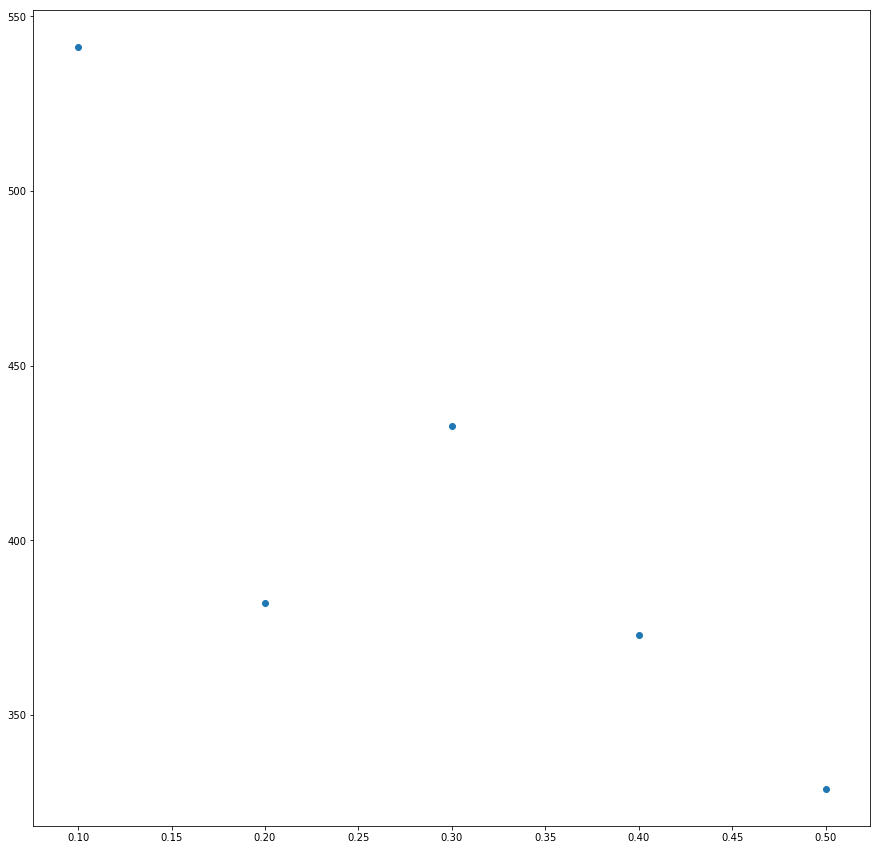

In [75]:
plt.scatter(outer_radius, sumSigma)
plt.show()

In [31]:
print(ind_outer[0])
print(dist_outer[0])

inner_radius = 0.2
outer_radius = 0.3

index = np.where((np.asarray(dist_outer[0]) > inner_radius) & (np.asarray(dist_outer[0]) < outer_radius))[0]
dist_index = []
# dist_index.append(index)
d = dist_outer[0][index]

print(index)
print(dist_outer[0][index])
print(d)


[131   6 143  63  65 473]
[0.38629285 0.34240284 0.36212694 0.18358294 0.34001787 0.12718034]
[]
[]
[]


In [32]:
# dist_outer_arcsec = []
# temp = []
# for i in range(len(kpc_DA)):
#     for j in range(len(dist_outer[i])):
#         x = np.float64(dist_outer[i][j] / kpc_DA[i])
# #         print(type(x))
#         temp.append(x)
#     dist_outer_arcsec.append(temp)
#     temp = []
        
# print(len(dist_outer_arcsec))
# print(dist_outer_arcsec[49])
# print(type(dist_outer_arcsec))
# print(type(dist_outer_arcsec[0]))
# print(type(dist_outer_arcsec[0][0]))
# print(len(dist_outer_arcsec))
# print(dist_outer_arcsec.dtype)
# print(dist_outer_arcsec)
print('-------------')

# a = dist_outer[49]/kpc_DA[49]
# print(a)


# dist_outer_kpc = []
# temp2 = []
# for i in range(len(kpc_DA)):
#     for j in range(len(dist_outer[i])):
#         y = np.float64(dist_outer[i][j] * 3600. * kpc_DA[i])
#         temp2.append(y)
#     dist_outer_kpc.append(temp2)
#     temp2 = []
    
# print(len(dist_outer_kpc))
# print(dist_outer_kpc[2])
# print(len(dist_outer_kpc[2]))

# a = dist_outer[9] * 3600. * kpc_DA[9]
# print(a)


# dist_outer_Mpc = []
# temp3 = []
# for i in range(len(dist_outer_kpc)):
#     for j in range(len(dist_outer_kpc[i])):
#         temp3.append(np.asarray(dist_outer_kpc[i]) / 1000.)
#     dist_outer_Mpc.append([temp3])
#     temp3 = []

# # print(len(dist_outer_Mpc))
# # print(dist_outer_Mpc[27])

# # a = np.asarray(dist_outer_kpc[27]) * (1./1000.)
# # print(a)

# a = 10.
# b = 5.
# # inner_radius = (radius_outer_kpc/a)*b
# inner_radius = 3000.
# # print(inner_radius)
# # outer_radius = (radius_outer_kpc/a)*(b + 1.)
# outer_radius = 4000.
# # print(outer_radius)


# print('-------------------')

dist_index = []
for i in range(len(dist_outer)):
    index = np.where((np.asarray(dist_outer[i]) > inner_radius) & (np.asarray(dist_outer[i]) < outer_radius))[0]
    dist_index.append(index)
    index = []
#     print(len(index))
    
# print(type(dist_index[0]))
# print(len(dist_index))
# print(len(ind_outer))

# ind = ind_outer[2][dist_index[2]]

ind = []
for i in range(len(ind_outer)):
    t = ind_outer[i][dist_index[i]]
    ind.append(t)
    
print(ind_outer[0])
print(dist_index[0])
print(ind[0])
print(len(ind[0]))
print('---------')
print(ind_outer[1])
print(dist_index[1])
print(ind[1])
print(len(ind[1]))
print('---------')
print(ind_outer[2])
print(dist_index[2])
print(ind[2])
print(len(ind[2]))
print('---------')
print(ind_outer[3])
print(dist_index[3])
print(ind[3])
print(len(ind[3]))
print('---------')
print(ind_outer[4])
print(dist_index[4])
print(ind[4])
print(len(ind[4]))
print('---------')
print(len(ind))


-------------
[131   6 143  63  65 473]
[]
[]
0
---------
[159 357 131   7   6  14 156  74 259 143  65 473]
[0 6]
[159 156]
2
---------
[278 243 231 312  34 266 230 328 170 362]
[1 2]
[243 231]
2
---------
[224  51 318 388  21  11 303]
[3 4 6]
[388  21 303]
3
---------
[460 154  32 292]
[2]
[32]
1
---------
25


In [33]:
# Creates CMDs of sources within the search radius for each LRG
# Below is the loop for the physical radius

xedges = np.array([13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.])
yedges = np.array([-10., -8., -6., -4., -2., 0., 2., 4., 6., 8., 10., 12., 14., 16.]) 

bkg = []
for i in range(len(ind)):
    # Creates a zero array if there are no near neighbors
    if len(ind[i]) == 0:
        temp1 = np.zeros((len(xedges) - 1, len(yedges) - 1))
        bkg.append(temp1)
#         print("1")
    # Creates a 2D histogram for satellite galaxies
    else:
        temp2, x_notuse, y_notuse = np.histogram2d(rmag_survey[ind[i]], color_survey[ind[i]], bins=(xedges, yedges), normed=False)
        bkg.append(temp2)
#         print("2")

print('bkg:', bkg)
print('length bkg', len(bkg))

sumbkg = []
for i in range(len(bkg)):
    sumbkg.append(np.sum(bkg[i]))
    
print("sumbkg:", sumbkg[0])
    
x = (np.asarray(sumbkg) / (np.pi * ((outer_radius)**2. - (inner_radius)**2.)))
print(x)

y = np.sum(x)
print(y)

bkg: [array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 

In [34]:
# This area calculation only works for physical radius. Look at localBKG.py for how to get area in arcsec
area = np.pi * ((outer_radius)**2. - (inner_radius)**2.)
print(area)

# Calculate the surface density sigma for each LRG
sigma = []
for i in range(len(bkg)):
    sigma.append(bkg[i] / area)

s = np.asarray(sigma)
print(s.shape)
    
# sigma_arcsec = []
# for i in range(len(bkg_arcsec)):
#     sigma_arcsec.append(bkg_arcsec[i] / area_annulus[i])

sum_sigma = np.sum(sigma)
print(sum_sigma)
# sum_sigma_arcsec = np.sum(sigma_arcsec)

error_kpc = np.sqrt(sum_sigma) / area
print(error_kpc)
# error_arcsec = np.sqrt(sum_sigma_arcsec) / sum_sigma_arcsec

0.15707963267948963
(25, 11, 13)
375.6056656968731
123.38040465353552
